In [1]:
# import dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from pathlib import Path
from collections import Counter
# Import the style from Matplotlib.
from matplotlib import style
import seaborn as sns

In [2]:
# Create a DataFrame for the healthcare-dataset-stroke-data.csv. 
file_path = Path("/Users/yumai/GITHUB/Project_03/Resources/healthcare-dataset-stroke-data.csv")
stroke_df = pd.read_csv(file_path)
stroke_df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [3]:
#view df information and datatypes 

stroke_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


---
### Data cleaning and preparation process 


In [4]:
# determine the number of rows and columns.
stroke_df_rc, stroke_df_cc = stroke_df.shape
print('Number of total rows:', stroke_df_rc)
print('Number of total columns:', stroke_df_cc)

Number of total rows: 5110
Number of total columns: 12


In [5]:
# Check all columns inside of the DataFrame
stroke_df.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [6]:
# Show missing values
print(stroke_df.isnull().sum())
print("Overall there are", sum(stroke_df.isnull().sum()), "missing values in bmi column")

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64
Overall there are 201 missing values in bmi column


In [7]:
# show duplicates
duplicate = stroke_df[stroke_df.duplicated()]
print("Duplicate Rows:", len(duplicate), "\n")

Duplicate Rows: 0 



In [8]:
# explore the 'bmi' columns
stroke_df['bmi'].describe()

count    4909.000000
mean       28.893237
std         7.854067
min        10.300000
25%        23.500000
50%        28.100000
75%        33.100000
max        97.600000
Name: bmi, dtype: float64

In [9]:
# Drop all rows with missing information 
stroke_df = stroke_df.dropna(how='any')

In [10]:
# Drop the  ID column
stroke_df = stroke_df.drop(columns = ['id'])

In [11]:
stroke_df.count()

gender               4909
age                  4909
hypertension         4909
heart_disease        4909
ever_married         4909
work_type            4909
Residence_type       4909
avg_glucose_level    4909
bmi                  4909
smoking_status       4909
stroke               4909
dtype: int64

In [12]:
# print out columns and number of unique values
for col in stroke_df.columns:
    print(col, stroke_df[col].nunique())

gender 3
age 104
hypertension 2
heart_disease 2
ever_married 2
work_type 5
Residence_type 2
avg_glucose_level 3852
bmi 418
smoking_status 4
stroke 2


In [13]:
# Count the number of 'Other' instances in 'gender' 
other_gender_count = (stroke_df['gender'] == 'Other').sum()

print(f'In this dataset there is other gender:', {other_gender_count})

In this dataset there is other gender: {1}


In [14]:
# Drop the row with 'Other' for 'gender'
stroke_df = stroke_df[stroke_df['gender'] != 'Other']

In [15]:
stroke_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4908 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4908 non-null   object 
 1   age                4908 non-null   float64
 2   hypertension       4908 non-null   int64  
 3   heart_disease      4908 non-null   int64  
 4   ever_married       4908 non-null   object 
 5   work_type          4908 non-null   object 
 6   Residence_type     4908 non-null   object 
 7   avg_glucose_level  4908 non-null   float64
 8   bmi                4908 non-null   float64
 9   smoking_status     4908 non-null   object 
 10  stroke             4908 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 460.1+ KB


In [16]:
stroke_df.head(10)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
6,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
7,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1
9,Female,78.0,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1
10,Female,81.0,1,0,Yes,Private,Rural,80.43,29.7,never smoked,1
11,Female,61.0,0,1,Yes,Govt_job,Rural,120.46,36.8,smokes,1


In [17]:
# look at statistical overview of the DataFrame
stroke_df.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,4908.000000,4908.000000,4908.000000,4908.000000,4908.00000,4908.000000
mean,42.868810,0.091891,0.049511,105.297402,28.89456,0.042584
std,22.556128,0.288901,0.216954,44.425550,7.85432,0.201937
min,0.080000,0.000000,0.000000,55.120000,10.30000,0.000000
25%,25.000000,0.000000,0.000000,77.067500,23.50000,0.000000
50%,44.000000,0.000000,0.000000,91.680000,28.10000,0.000000
75%,60.000000,0.000000,0.000000,113.495000,33.10000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.60000,1.000000


In [18]:
stroke_df.to_csv('stroke_clean', index=False)

---
### Exploratory Data Analysis (EDA)



In [18]:
# Look at the stroke outcome value counts
stroke_counts = stroke_df['stroke'].value_counts()
stroke_counts

stroke
0    4699
1     209
Name: count, dtype: int64

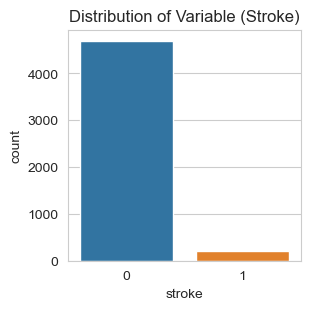

In [19]:
# Set the style of all graphs to seaborn
sns.set_style("whitegrid")

# Plot the variable 'stroke' and look at the distribution of stroke in this dataset 
plt.figure(figsize=(3, 3))
sns.countplot(x=stroke_df['stroke'], )
plt.title('Distribution of Variable (Stroke)')
plt.show()


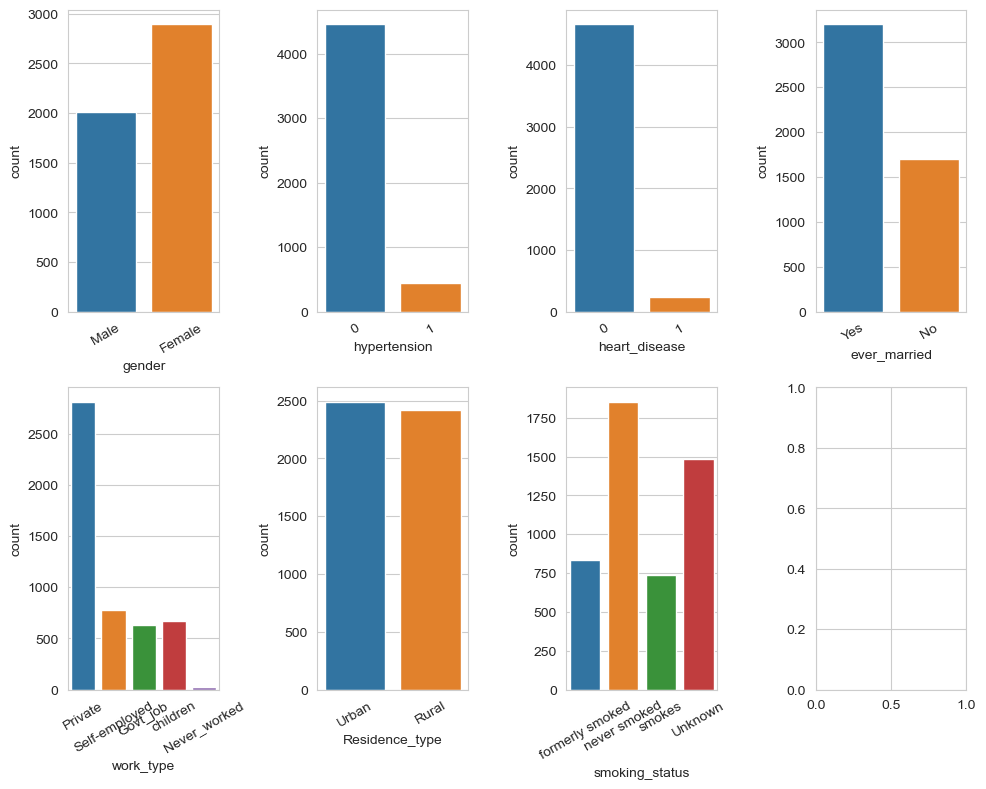

In [20]:
# List of variables 
variables = ['gender', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']

# Plotting the bar plots
fig, axs = plt.subplots(nrows=2, ncols=4, figsize=(10, 8))

for var, subplot in zip(variables, axs.flatten()):
    sns.countplot(x=var, data=stroke_df, ax=subplot)
    for label in subplot.get_xticklabels():
        label.set_rotation(30)

plt.tight_layout()
plt.show()

/opt/anaconda3/envs/inclassfeb2024/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/envs/inclassfeb2024/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/envs/inclassfeb2024/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


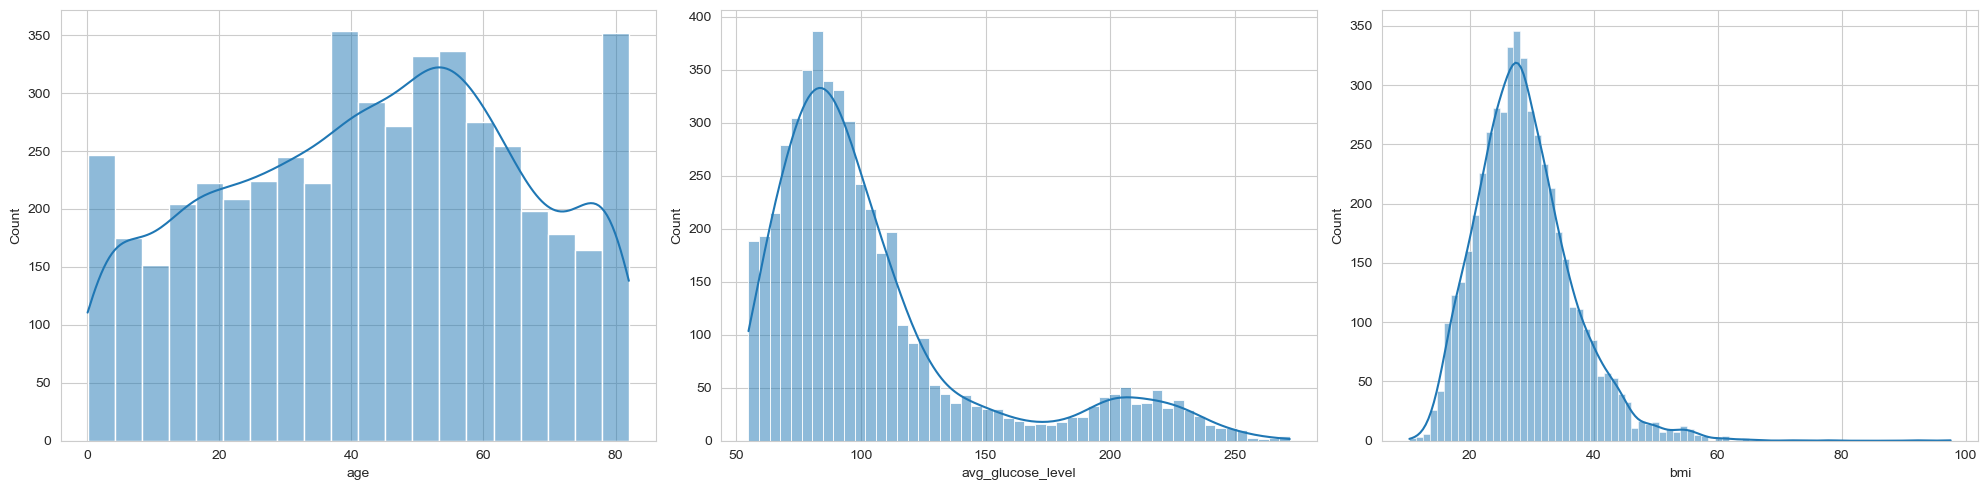

In [21]:
# List of variables 'age', 'avg_glucose_level', 'bmi'
stroke_predictors_variables = ['age', 'avg_glucose_level', 'bmi']

# Plot the histograms for those variables
fig, axs = plt.subplots(1, 3, figsize=(20, 5))

for var, subplot in zip(stroke_predictors_variables, axs.flatten()):
    sns.histplot(stroke_df[var], kde=True, ax=subplot)

plt.tight_layout()
plt.show()

## DEMOGRAPHIC (unchangeable metric)

---
### Age and stroke analysis

/opt/anaconda3/envs/inclassfeb2024/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


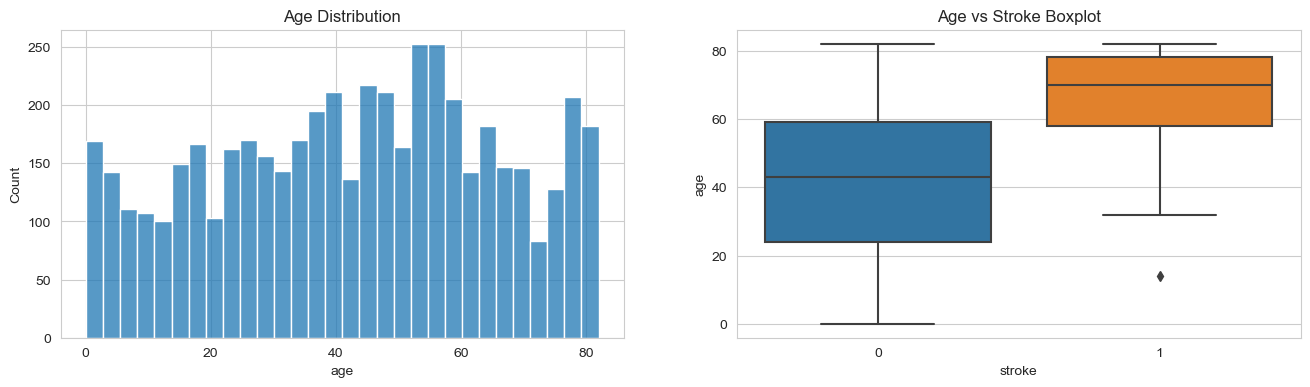

In [22]:
# Examine how age is correlate with stroke 

fig, axes = plt.subplots(1,2, figsize=(16,4))

sns.histplot(x=stroke_df["age"], data=stroke_df, bins=30, ax=axes[0])
axes[0].set_title("Age Distribution")

sns.boxplot(y=stroke_df["age"], x="stroke", data=stroke_df, ax=axes[1])
axes[1].set_title("Age vs Stroke Boxplot")
plt.show()

/opt/anaconda3/envs/inclassfeb2024/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'Age/Stroke Distribution')

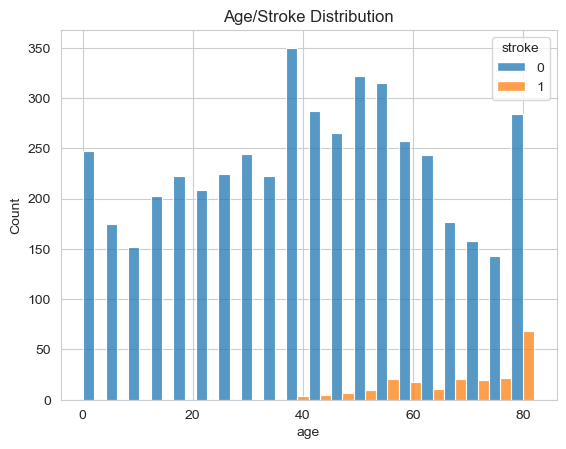

In [23]:
# Create a plot showing the age with stroke versus without stroke.
sns.histplot(data=stroke_df, x='age', hue='stroke', multiple='dodge').set_title('Age/Stroke Distribution')


/var/folders/bb/58xtq6zd03z6j840hj_gdn9h0000gn/T/ipykernel_16373/886907360.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(stroke_df.loc[stroke_df['stroke'] == 1]['age'], color='#FF0000', label='Stroke', shade=True)
/opt/anaconda3/envs/inclassfeb2024/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/var/folders/bb/58xtq6zd03z6j840hj_gdn9h0000gn/T/ipykernel_16373/886907360.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(stroke_df.loc[stroke_df['stroke'] == 0]['age'], color='#B0C4DE', label='No Stroke', shade=True)
/opt/anaconda3/envs/in

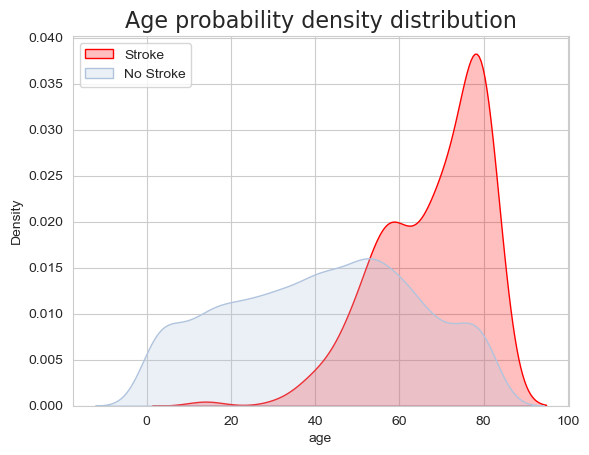

In [24]:
# Age probability density distribution
sns.kdeplot(stroke_df.loc[stroke_df['stroke'] == 1]['age'], color='#FF0000', label='Stroke', shade=True)
sns.kdeplot(stroke_df.loc[stroke_df['stroke'] == 0]['age'], color='#B0C4DE', label='No Stroke', shade=True)
plt.title('Age probability density distribution', fontproperties='SimHei', fontsize=16)
plt.legend(loc=2)
plt.show()

##### Stroke cases are more common in older patients. The median age of stroke patients appears to be higher than that of non-stroke patients. 

##### Aging has been identified to be the most robust non-modifiable risk factor for stroke, which doubles the risk every 10 years after 55 years. 

--
### Gender and stroke analysis

In [25]:
# Look at the gender outcome value counts
gender_counts = stroke_df['gender'].value_counts()
gender_counts

gender
Female    2897
Male      2011
Name: count, dtype: int64

In [26]:
pd.crosstab(stroke_df['stroke'],stroke_df['gender'],margins=True,margins_name='Total')

gender,Female,Male,Total
stroke,,,
0,2777,1922,4699
1,120,89,209
Total,2897,2011,4908


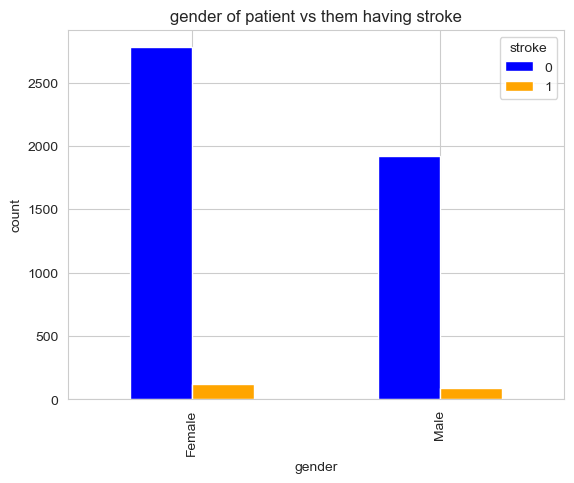

In [27]:
color=['blue','orange']
pd.crosstab(stroke_df['gender'],stroke_df['stroke']).plot(kind='bar',color=color)
plt.title('gender of patient vs them having stroke')
plt.ylabel('count')
plt.show()

--
### Age & Gender vs Stroke

Text(0.5, 1.0, 'Age/Gender-Stroke Distribution')

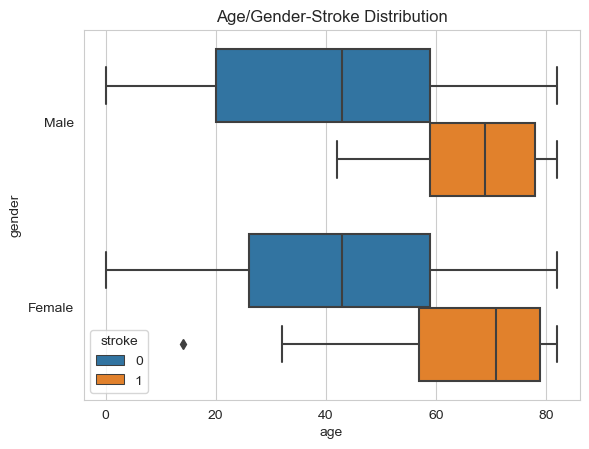

In [28]:
# create a plot (boxplot) with age, gender, and stroke
sns.boxplot(data = stroke_df, x=stroke_df['age'], y=stroke_df['gender'], hue=stroke_df['stroke']).set_title('Age/Gender-Stroke Distribution')


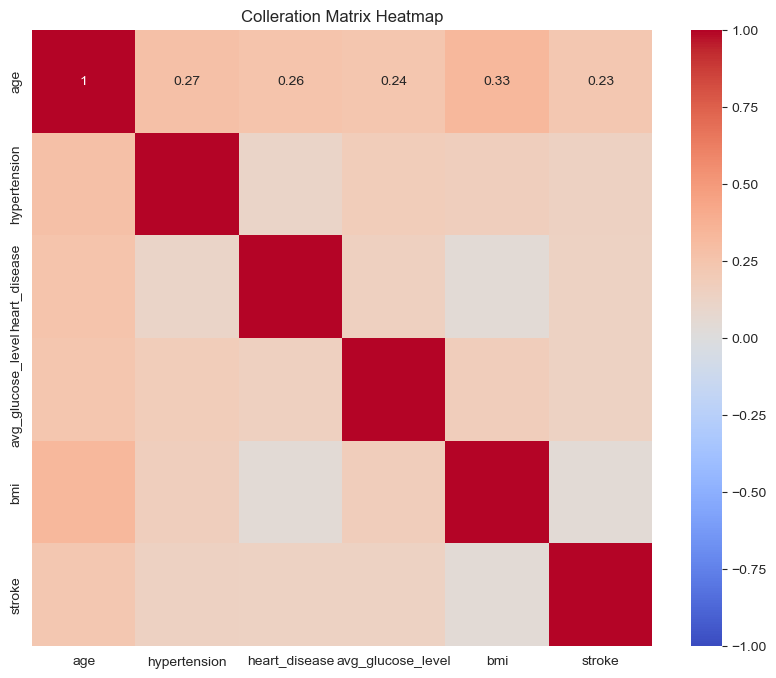

In [31]:
# Create the HeatMap 

drop_df = stroke_df.select_dtypes(include=['int64','float64'])

colleration_matrix = drop_df.corr()

plt.figure(figsize=(10, 8))

sns.heatmap(colleration_matrix, annot=True, cmap= 'coolwarm', vmin=-1, vmax=1)

plt.title('Colleration Matrix Heatmap')
plt.show()


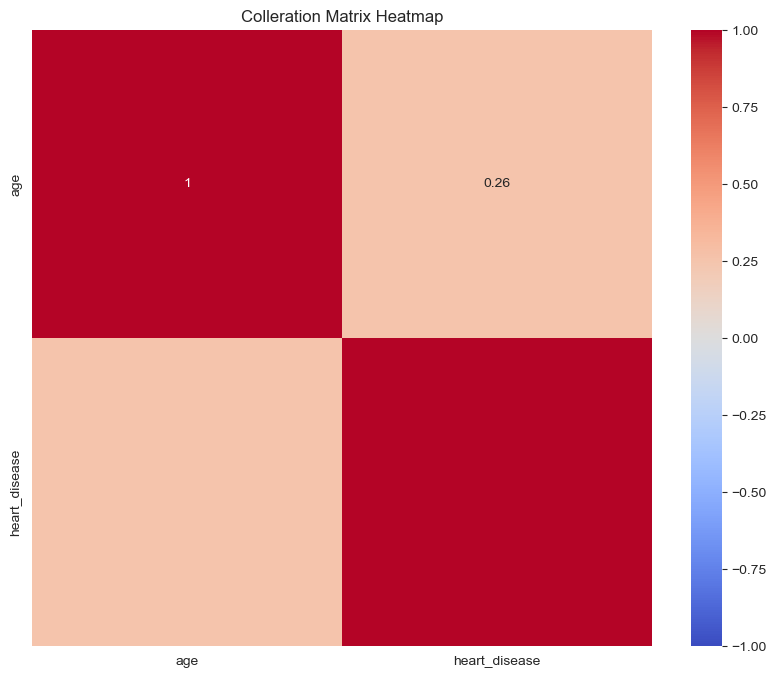

In [36]:
# Create the Heat Map looking into 'age' and 'heart_disease'

df = stroke_df[['age','heart_disease']]

colleration_matrix = df.corr()

plt.figure(figsize=(10, 8))

sns.heatmap(colleration_matrix, annot=True, cmap= 'coolwarm', vmin=-1, vmax=1)

plt.title('Colleration Matrix Heatmap')
plt.show()


In [18]:
stroke_df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


In [20]:
gluc_norm = stroke_df.loc[(stroke_df["avg_glucose_level"] > 70) & (stroke_df["avg_glucose_level"] < 100)]
gluc_norm["avg_glucose_level"] = "NORMAL"

gluc_pre = stroke_df.loc[(stroke_df["avg_glucose_level"] > 100) & (stroke_df["avg_glucose_level"] < 125)]
gluc_pre["avg_glucose_level"] = "PRE-DIABETIC"

gluc_diab = stroke_df.loc[(stroke_df["avg_glucose_level"] > 126)]
gluc_diab["avg_glucose_level"] = "DIABETIC"

gluc_low = stroke_df.loc[(stroke_df["avg_glucose_level"] < 70)]
gluc_low["avg_glucose_level"] = "HYPOGLYCEMIC"

gluc_norm.reset_index(drop=True, inplace=True)
gluc_pre.reset_index(drop=True, inplace=True)
gluc_diab.reset_index(drop=True, inplace=True)
gluc_low.reset_index(drop=True, inplace=True)

gluc_grouped = pd.concat([gluc_norm, gluc_pre, gluc_diab, gluc_low], ignore_index=False, axis=0)
gluc_grouped.head()

C:\Users\yumai\AppData\Local\Temp\ipykernel_11364\3484300245.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gluc_norm["avg_glucose_level"] = "NORMAL"
C:\Users\yumai\AppData\Local\Temp\ipykernel_11364\3484300245.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gluc_pre["avg_glucose_level"] = "PRE-DIABETIC"
C:\Users\yumai\AppData\Local\Temp\ipykernel_11364\3484300245.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,74.0,1,1,Yes,Private,Rural,NORMAL,27.4,never smoked,1
1,Female,69.0,0,0,No,Private,Urban,NORMAL,22.8,never smoked,1
2,Female,81.0,1,0,Yes,Private,Rural,NORMAL,29.7,never smoked,1
3,Female,60.0,0,0,No,Private,Urban,NORMAL,37.8,never smoked,1
4,Male,42.0,0,0,Yes,Private,Rural,NORMAL,25.4,Unknown,1


c:\Users\yumai\anaconda3\envs\Class2024\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\yumai\anaconda3\envs\Class2024\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


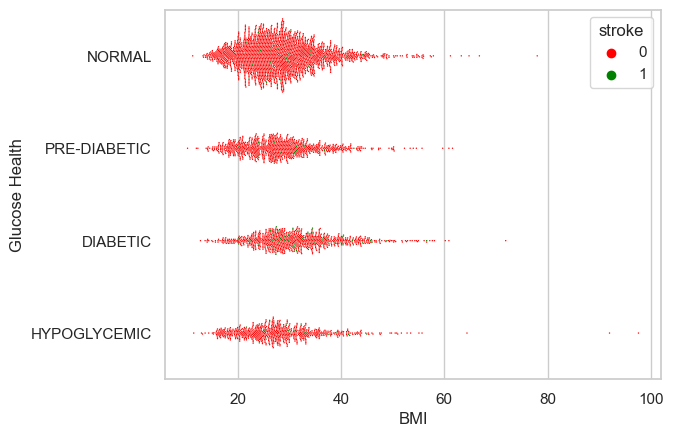

<Figure size 3000x2300 with 0 Axes>

In [46]:
sns.set_theme(style="whitegrid", palette="muted")

glucxbmi = sns.swarmplot(data = gluc_grouped, x="bmi", y="avg_glucose_level", hue="stroke", palette= ("red", "green"),
                         s = 1)
glucxbmi.set(ylabel="Glucose Health")
glucxbmi.set(xlabel="BMI")

plt.figure(figsize=(30, 23))
plt.tight_layout()
plt.show()

c:\Users\yumai\anaconda3\envs\Class2024\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\yumai\anaconda3\envs\Class2024\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


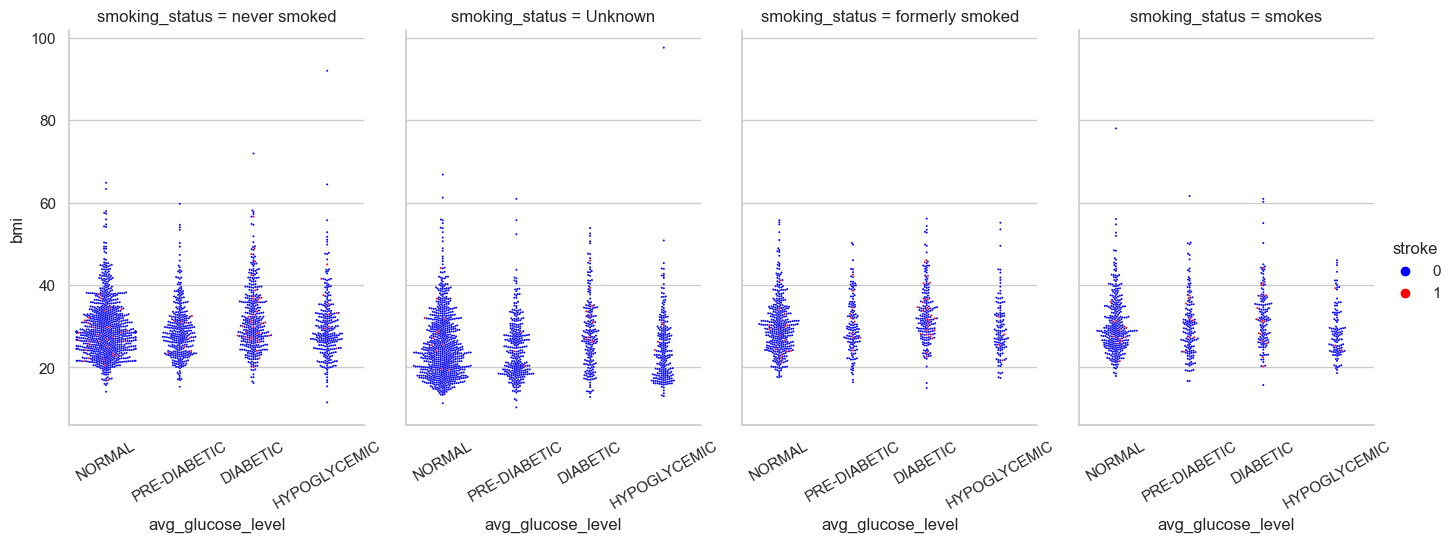

<Figure size 3000x2300 with 0 Axes>

In [49]:
sns.set_theme(style="whitegrid", palette="muted")

glucbmi = sns.catplot(
    data=gluc_grouped, x="avg_glucose_level", y="bmi", hue="stroke", palette= ("blue", "red"),
    s = 2,
    kind="swarm", col="smoking_status", aspect=.7
)
plt.figure(figsize=(30, 23))
glucbmi.set_xticklabels(rotation=30)
plt.tight_layout()
plt.show()

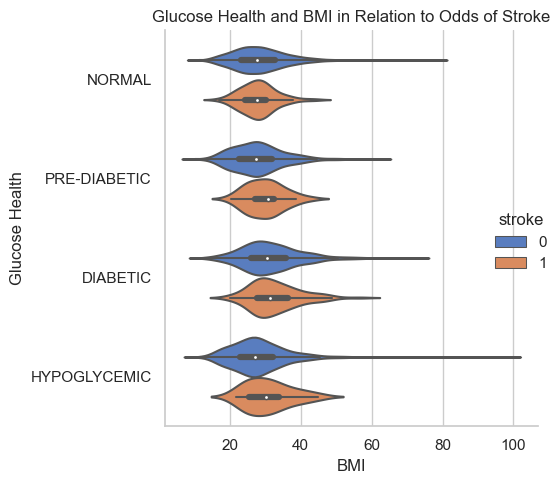

In [29]:
sns.set_theme(style="whitegrid", palette="muted")
glucbmisex = sns.catplot(
    data= gluc_grouped, x="bmi", y="avg_glucose_level", hue="stroke", kind="violin",
)

glucbmisex.set(ylabel="Glucose Health")
glucbmisex.set(xlabel="BMI")
glucbmisex.set(title= "Glucose Health and BMI in Relation to Odds of Stroke")

plt.tight_layout()
plt.show()

In [64]:
strokes = stroke_df.copy

In [54]:
strokeonly = stroke_df[stroke_df['stroke'] == 1]
nostrokeonly = stroke_df[stroke_df['stroke'] == 0]
strokeonly.head()


,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


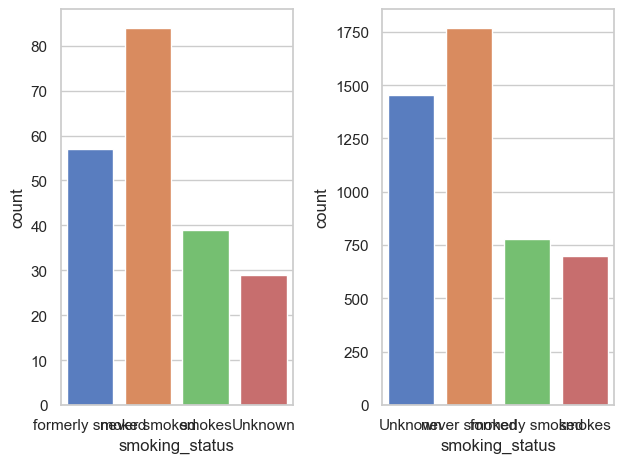

In [80]:
sns.set_theme(style="whitegrid", palette="muted")

smokingvsstroke, ax = plt.subplots(1,2)
str = sns.countplot(strokeonly, x="smoking_status", ax=ax[0])
nostr = sns.countplot(nostrokeonly, x="smoking_status", ax=ax[1])

plt.tight_layout()
plt.show()

<Axes: xlabel='avg_glucose_level', ylabel='count'>

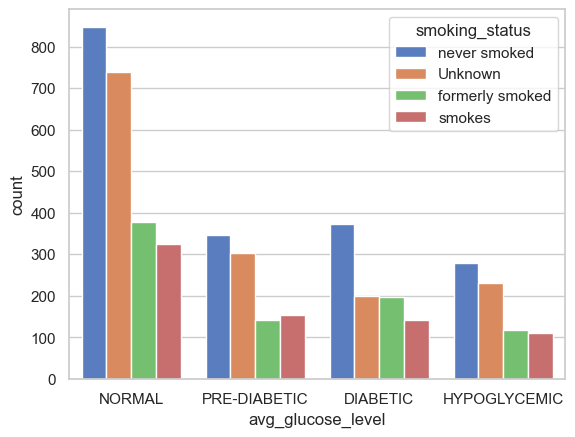

In [90]:
sns.countplot(gluc_grouped, x="avg_glucose_level", hue="smoking_status")

c:\Users\yumai\anaconda3\envs\Class2024\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\yumai\anaconda3\envs\Class2024\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\yumai\anaconda3\envs\Class2024\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 9.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


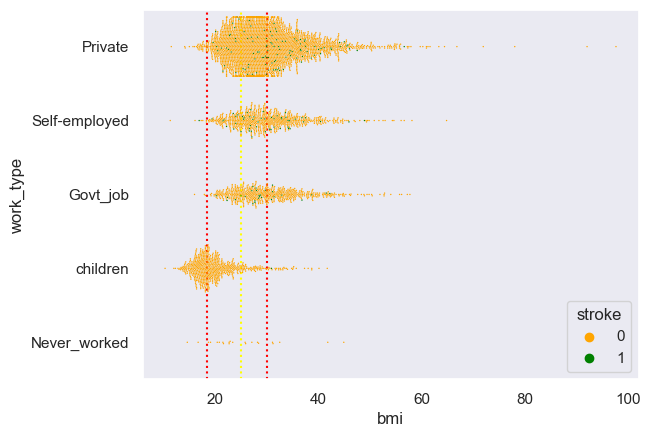

<Figure size 4000x3300 with 0 Axes>

In [120]:
sns.set_theme(style="dark", palette="muted")

workbmi = sns.swarmplot(data = stroke_df, x="bmi", y="work_type", hue="stroke", palette= ("orange", "green"),
                         s = 1)
glucxbmi.set(ylabel="work_type")
glucxbmi.set(xlabel="bmi")

plt.axvline(x = 25, ymin = 0, ymax = 1,
           color = "yellow", linestyle= "dotted")

plt.axvline(x = 30, ymin = 0, ymax = 1,
           color = "red", linestyle= "dotted")

plt.axvline(x = 18.5, ymin = 0, ymax = 1,
           color = "red", linestyle= "dotted")

plt.figure(figsize=(40, 33))
plt.tight_layout()
plt.show()

c:\Users\yumai\anaconda3\envs\Class2024\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\yumai\anaconda3\envs\Class2024\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


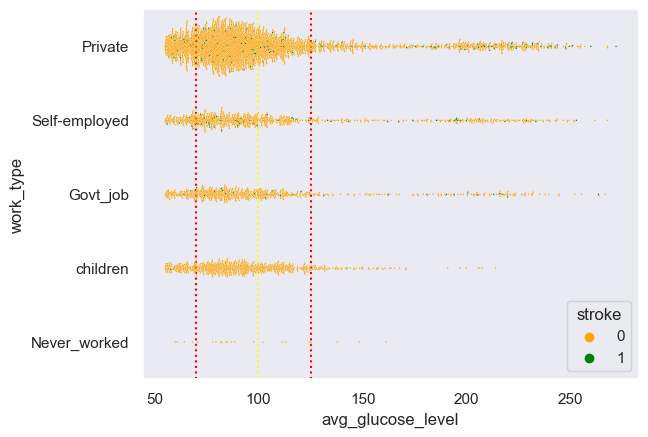

<Figure size 4000x3300 with 0 Axes>

In [122]:
sns.set_theme(style="dark", palette="muted")

workbmi = sns.swarmplot(data = stroke_df, x="avg_glucose_level", y="work_type", hue="stroke", palette= ("orange", "green"),
                         s = 1)
glucxbmi.set(ylabel="work_type")
glucxbmi.set(xlabel="bmi")

plt.axvline(x = 100, ymin = 0, ymax = 1,
           color = "yellow", linestyle= "dotted")

plt.axvline(x = 70, ymin = 0, ymax = 1,
           color = "red", linestyle= "dotted")

plt.axvline(x = 125, ymin = 0, ymax = 1,
           color = "red", linestyle= "dotted")

plt.figure(figsize=(40, 33))
plt.tight_layout()
plt.show()

c:\Users\yumai\anaconda3\envs\Class2024\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\yumai\anaconda3\envs\Class2024\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\yumai\anaconda3\envs\Class2024\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\yumai\anaconda3\envs\Class2024\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in 

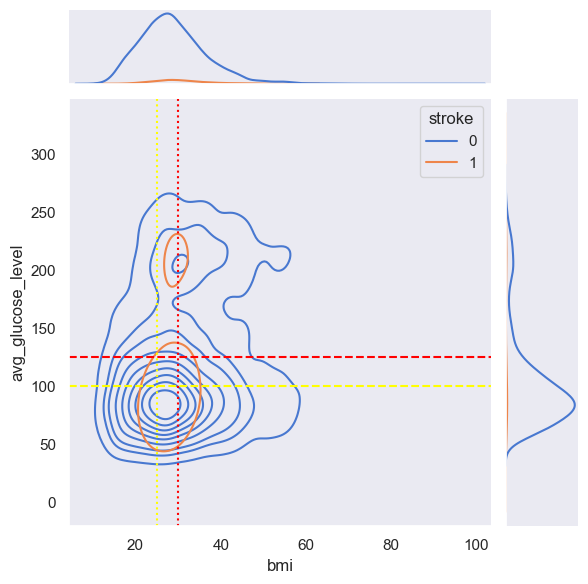

<Figure size 4000x3300 with 0 Axes>

In [115]:
sns.set_theme(style = "dark", palette="muted")

sns.jointplot(
    data=stroke_df,
    x="bmi", y="avg_glucose_level", hue="stroke",
    kind="kde",
)

plt.axhline(y = 100, xmin = 0, xmax = 1,
           color = "yellow", linestyle= "dashed")

plt.axhline(y = 125, xmin = 0, xmax = 1,
           color = "red", linestyle= "dashed")

plt.axvline(x = 25, ymin = 0, ymax = 1,
           color = "yellow", linestyle= "dotted")

plt.axvline(x = 30, ymin = 0, ymax = 1,
           color = "red", linestyle= "dotted")

plt.figure(figsize=(40, 33))
plt.tight_layout()
plt.show()